In [2]:
# pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("data/house-pricing/train.csv")
dfp = df.drop(columns = ['POSTED_BY','BHK_OR_RK','LONGITUDE','LATITUDE','ADDRESS'])
dfp.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
0,0,0,2,1300.236407,1,1,55.0
1,0,0,2,1275.000000,1,1,51.0
2,0,0,2,933.159722,1,1,43.0
3,0,1,2,929.921143,1,1,62.5
4,1,0,2,999.009247,0,1,60.5


In [57]:
x = dfp.drop(columns = ['TARGET(PRICE_IN_LACS)'])
y = dfp['TARGET(PRICE_IN_LACS)']

In [58]:
# source : https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
# Inisiasi Model 
# Ini intinya yang harus dipahamin dan saya belum paham hehe
model = Sequential()
model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])

# Summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [59]:
# train
history_model = model.fit(x,y,epochs=50)

Epoch 1/50
921/921 [==============================] - 1s 1ms/step - loss: 887963776.0000 - mean_squared_error: 887963776.0000
Epoch 2/50
921/921 [==============================] - 1s 1ms/step - loss: 261194784.0000 - mean_squared_error: 261194784.0000
Epoch 3/50
921/921 [==============================] - 2s 2ms/step - loss: 1955001.3750 - mean_squared_error: 1955001.3750
Epoch 4/50
921/921 [==============================] - 1s 1ms/step - loss: 602358.1875 - mean_squared_error: 602358.1875
Epoch 5/50
921/921 [==============================] - 1s 2ms/step - loss: 582656.0000 - mean_squared_error: 582656.0000
Epoch 6/50
921/921 [==============================] - 1s 1ms/step - loss: 2367813.2500 - mean_squared_error: 2367813.2500
Epoch 7/50
921/921 [==============================] - 2s 2ms/step - loss: 68114184.0000 - mean_squared_error: 68114184.0000
Epoch 8/50
921/921 [==============================] - 1s 1ms/step - loss: 10212133.0000 - mean_squared_error: 10212133.0000
Epoch 9/50
921/9

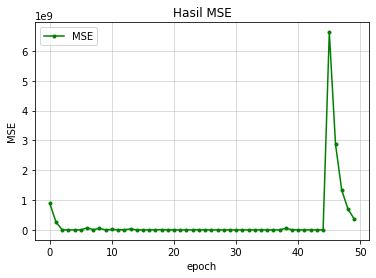

In [60]:
plt.plot(history_model.history['mean_squared_error'],color='green',marker='.')
plt.title('Hasil MSE')
plt.xlabel('epoch')
plt.grid(color='darkgray', linestyle='-',alpha=0.5)
plt.ylabel('MSE')
plt.legend(['MSE'])
plt.show()

In [62]:
mse_max = max(history_model.history['mean_squared_error'])
epoch_mse = history_model.history['mean_squared_error'].index(max(history_model.history['mean_squared_error']))
print(f'MAX MSE : {mse_max}')
print(f'EPOCH   : {epoch_mse+1}')

MAX MSE : 6624541184.0
EPOCH   : 46
